In [41]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", ""]

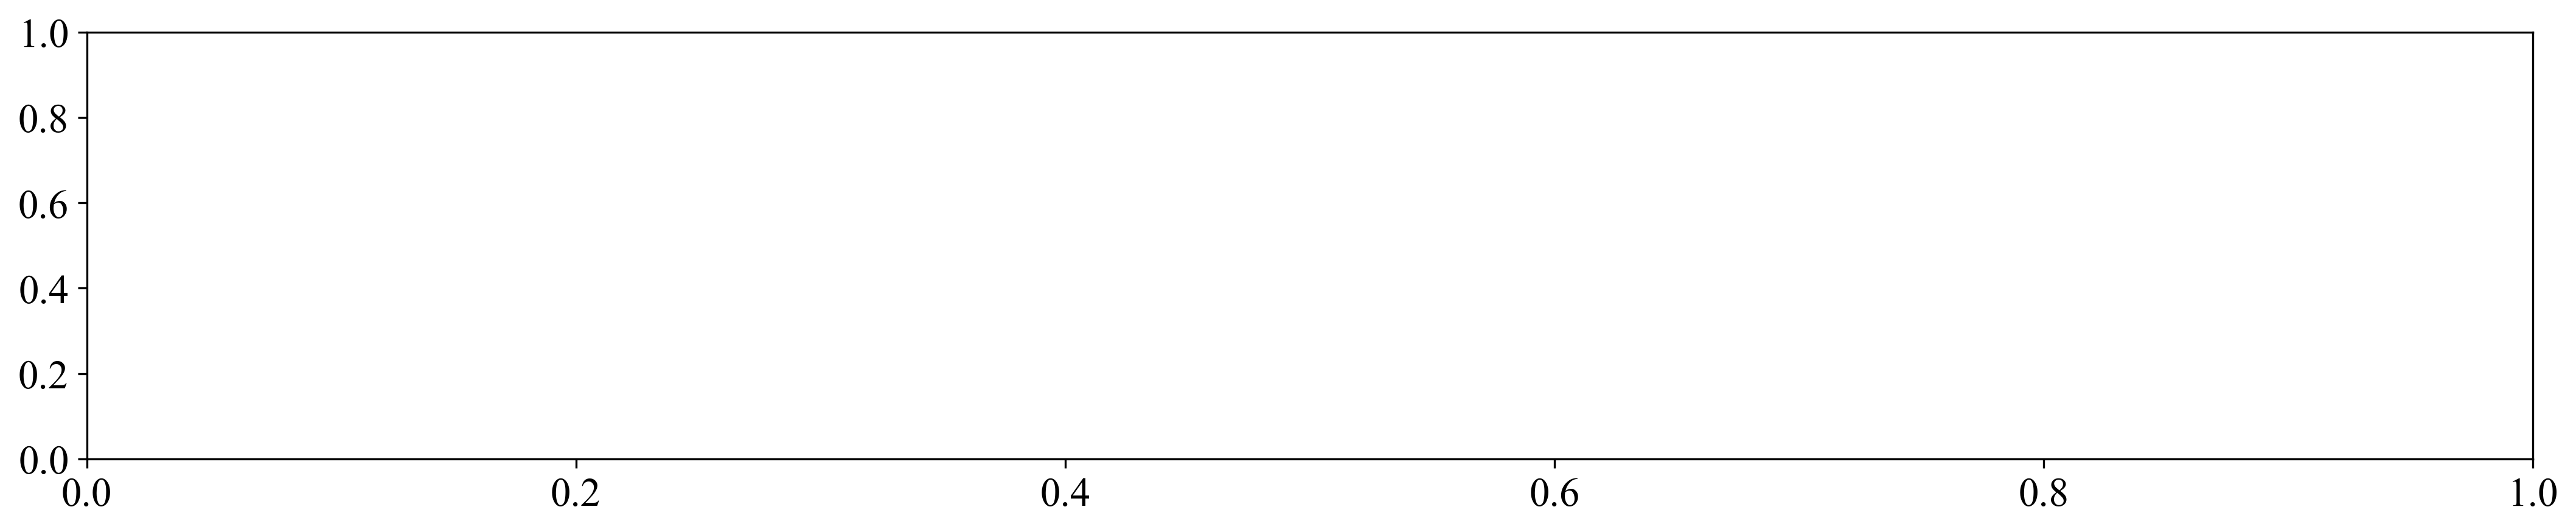

In [42]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 5), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

In [43]:
labels_name_a = [
    "ModelA\n8DP\n-",
    "ModelA\n-\n8TP",
    "ModelB\n-\n8TP",
    "ModelA\n2DP\n$\\times$4TP",
    "ModelA\n2DP\n$\\times$8TP",
    "ModelA\n4DP\n$\\times$2TP",
    "ModelB\n4DP\n$\\times$2TP",
    "ModelC\n-\n8EP$\\times$8TP",
    "ModelC\n2DP$\\times$\n8EP$\\times$8TP",
    "ModelD\n-\n8EP$\\times$8TP",
    "ModelD\n2DP$\\times$\n8EP$\\times$8TP",
]

In [44]:
# MFU
data_a = {
    labels_name_a[0]: [41.0, 34.2, 44.4],  # modela 8DP
    labels_name_a[1]: [26.2, 36.8, 43.6],  # modela 8TP
    labels_name_a[2]: [30.1, 39.6, 49.4],  # modelb 8TP
    labels_name_a[3]: [37.1, 30.4, 44.6],  # modela 2DP 4TP
    labels_name_a[4]: [39.6, 37.2, 47.9],  # modela 2DP 8TP
    labels_name_a[5]: [40.4, 30.5, 44.7],  # modela 4DP 2TP
    labels_name_a[6]: [-1, 31.7, 38.0],  # modelb 4DP 2TP
    labels_name_a[7]: [9.3, 12.6, 13.7],  # modelc 1DP 8TP 8EP
    labels_name_a[8]: [4.0, 4.8, 5.3],  # modelc 2DP 8TP 8EP
    labels_name_a[9]: [15.1, 15.3, 16.3],  # modeld 1DP 8TP 8EP
    labels_name_a[10]: [4.2, 4.8, 5.3],  # modeld 2DP 8TP 8EP
}

In [45]:
a_m = 0
a_x = 0
for y_data in data_a.values():
    print(f"LM {round(y_data[2]/y_data[0], 2)} XLA {round(y_data[2]/y_data[1], 2)}")
    a_m += round(y_data[2] / y_data[0], 2)
    a_x += round(y_data[2] / y_data[1], 2)
print(a_m)
print(a_x)

LM 1.08 XLA 1.3
LM 1.66 XLA 1.18
LM 1.64 XLA 1.25
LM 1.2 XLA 1.47
LM 1.21 XLA 1.29
LM 1.11 XLA 1.47
LM -38.0 XLA 1.2
LM 1.47 XLA 1.09
LM 1.32 XLA 1.1
LM 1.08 XLA 1.07
LM 1.26 XLA 1.1
-24.970000000000002
13.52


In [46]:
legend_labels = ["Megatron-LM", "XLA", "Lynx"]

In [47]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_a.keys())
x_label_group_cnt = 3

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [48]:
label_set = set()
for idx, (x_label, y_data) in enumerate(data_a.items()):
    positions = group_positions[idx]
    up_base =[i for i in y_data if i > 0][0]

    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)
        if value == -1:
            ax.text(
                pos,
                1,
                "$\\times$OOM",
                rotation=90,
                ha="center",
                va="bottom",
                color="red",
            )
            continue
        up_v = round(value/up_base, 2)
        if up_v == 1:
            up_v = 1
        ax.text(
            pos,
            value + 2,
            f"{str(up_v)}$\\times$",
            ha="center",
            fontweight="bold",
            color=colors[1],
            rotation=90,
        )
        ax.bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 100)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax.tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax.set_ylabel("MFU (%)", fontsize=g_label_fontsize)

Text(13.333333333333346, 0.5, 'MFU (%)')

In [49]:
fig.legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    bbox_to_anchor=(0.5, 0.95),
    fontsize=g_label_fontsize,
)

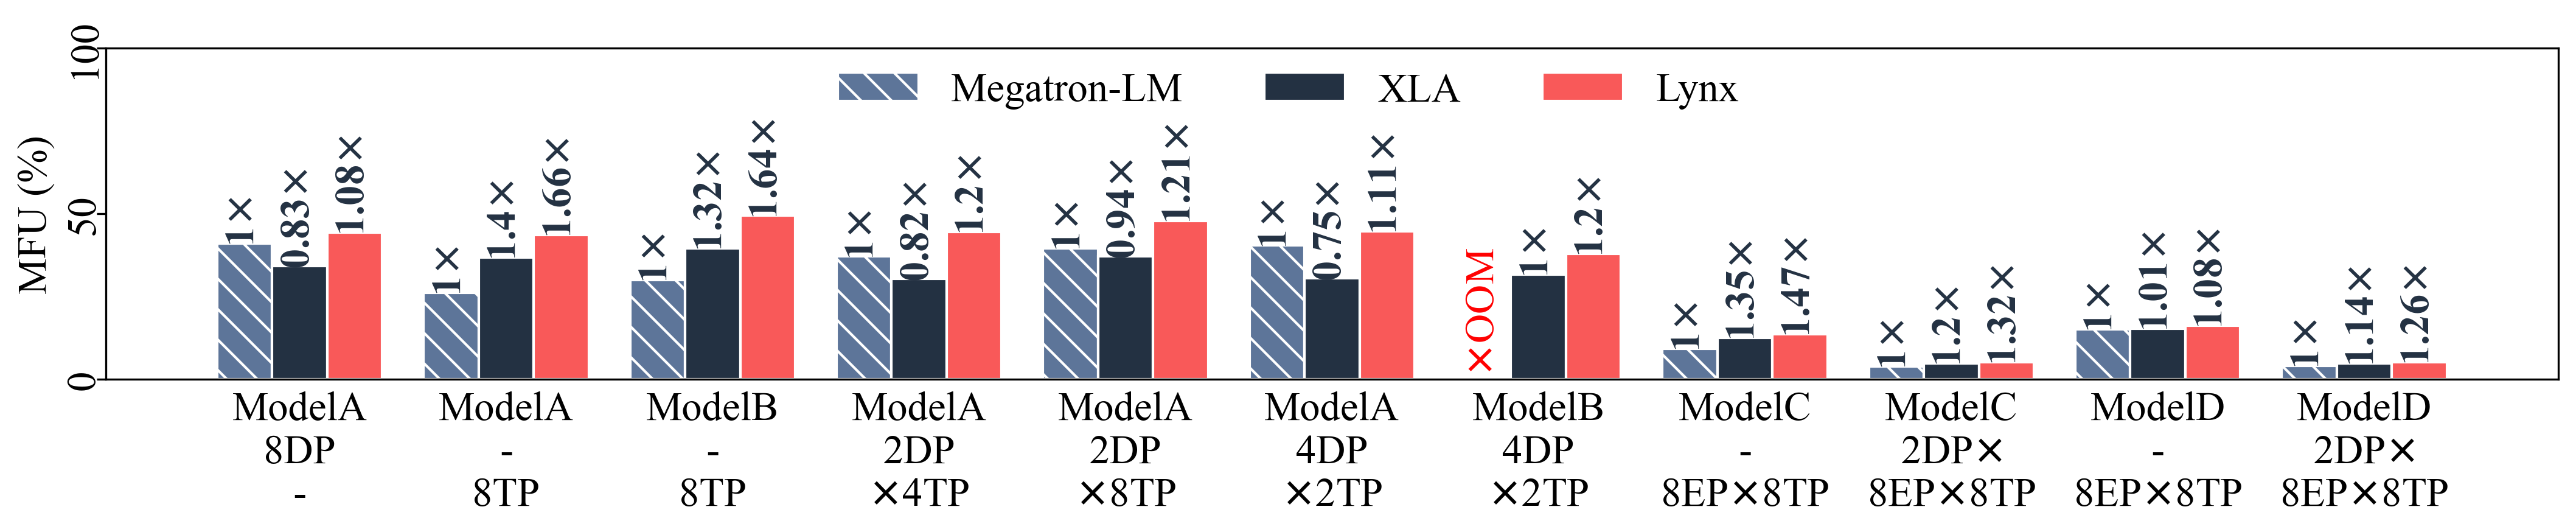

In [50]:
fig.savefig("end_to_end_mfu.pdf", bbox_inches="tight", dpi=1000)
fig